<a href="https://colab.research.google.com/github/aparna993/Capstone-Project/blob/main/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    # steps_per_epoch=8
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 0.1237 - accuracy: 0.9643 - val_loss: 0.0718 - val_accuracy: 0.9667
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.1220 - accuracy: 0.9643 - val_loss: 0.0526 - val_accuracy: 0.9833
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.0570 - accuracy: 0.9777 - val_loss: 0.0837 - val_accuracy: 0.9667
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.1705 - accuracy: 0.9420 - val_loss: 0.0735 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.0943 - accuracy: 0.9420 - val_loss: 0.0947 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.0906 - accuracy: 0.9688 - val_loss: 0.0684 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.0695 - accuracy: 0.9688 - val_loss: 0.0549 - val_accuracy: 0.9500
Epoch 8/10
7/7 [========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


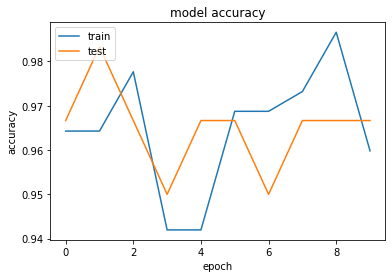

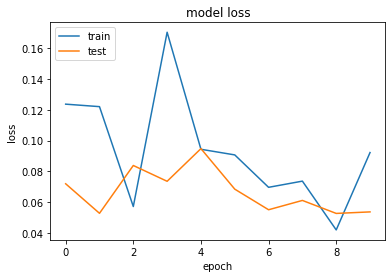

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()